## ADSB 2 - Iykra ( Andi Muhammad Isra)

In [12]:
import pandas as pd
from pandas import Series, DataFrame

In [13]:
#Mengambil data train.csv dan menjadikannya bagian dari DataFrame
data_df = pd.read_csv('train.csv')

#menampilkan 10 data awal yang berhasil dibaca
data_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
#membaca general information dari dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
data_df.shape

(891, 12)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Pada kasus ini, saya mengambil sampel yang selamat berdasarkan kategori Sex/Gender.

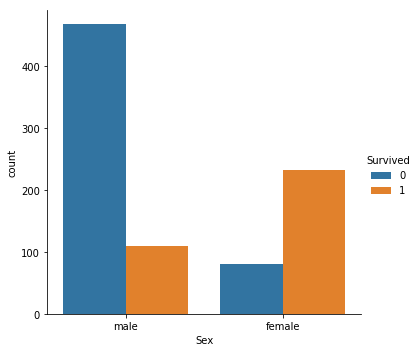

In [17]:
sns.catplot('Sex', kind="count", hue="Survived", data=data_df)

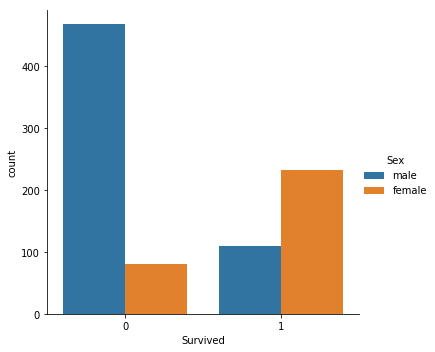

In [18]:
#kita bisa mengganti class attribut dari chart ini sesuai dengan apa yang ingin kita perlihatkan, seperti berikut.
sns.catplot('Survived', kind="count", hue="Sex", data=data_df)

In [19]:
pd.Categorical(data_df['Survived']).describe()

,counts,freqs
categories,,
0,549,0.616162
1,342,0.383838


In [20]:
data_df=data_df.drop(['Name'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


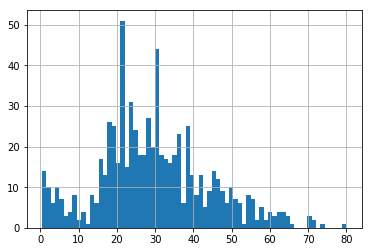

In [22]:
data_df['Age'].hist(bins=70)

In [24]:
data_df['Age'].max()

80.0

In [25]:
data_df['Age'].mean()

29.69911764705882

In [42]:
data_df['person'].value_counts()

male      488
female    239
Child     164
Name: person, dtype: int64

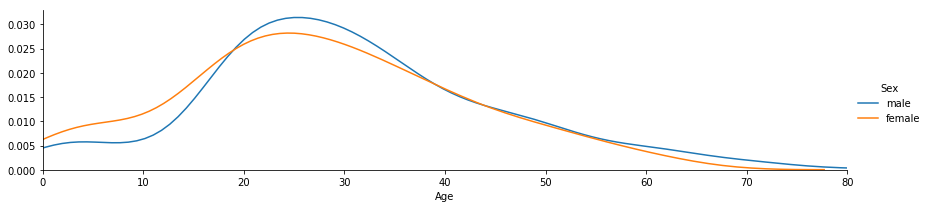

In [43]:
gambar = sns.FacetGrid(data_df, hue='Sex', aspect=4)
gambar.map(sns.kdeplot,'Age', shade=False)

oldest = data_df['Age'].max()

gambar.set(xlim=(0,oldest))

gambar.add_legend()

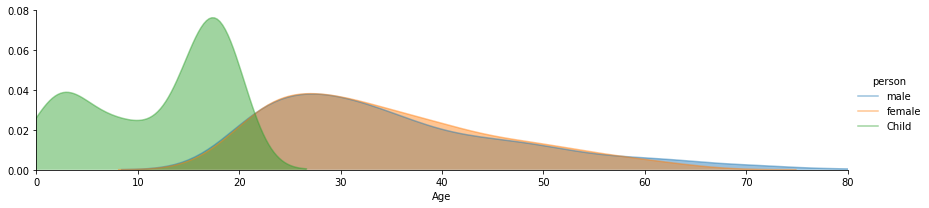

In [44]:
gambar = sns.FacetGrid(data_df, hue='person', aspect=4)
gambar.map(sns.kdeplot,'Age', shade=True, alpha=0.45)

oldest = data_df['Age'].max()

gambar.set(xlim=(0,oldest))

gambar.add_legend()

In [45]:
 data_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [48]:
#Melihat banyaknya NaN pada kolom Cabin, hal tersebut dapat mengganggu kegiatan analisa data kita kedepannya. 
#Kita bisa menghapus NaN pada kolom Cabin yang mana data barunya akan kita attributkan ke Dek

dek = data_df['Cabin'].dropna()
dek.head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

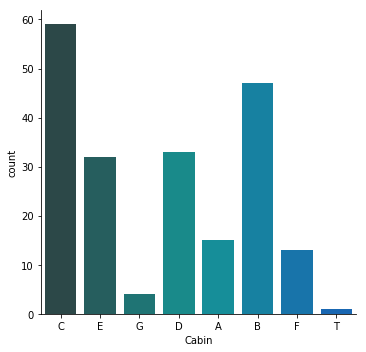

In [64]:
levels = []

for level in dek:
    levels.append(level[0])

dek_df = DataFrame(levels)
dek_df.columns = ['Cabin']

sns.catplot('Cabin', data=dek_df, palette='winter_d', kind="count")

Teman-teman bisa perhatikan, terdapat satu keanehan pada plot diatas, yaitu munculnya nilai T value pada hasil plot. Untuk menghilangkan kategori tersebut dari plot, bisa kita gunakan syntax dibawah ini

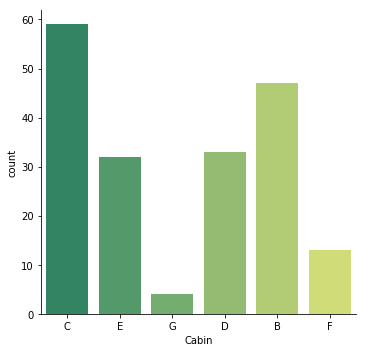

In [60]:
dek_df = dek_df[dek_df.Cabin != 'T']

sns.catplot('Cabin', data=dek_df, palette='summer', kind="count")

### Passengers Analysis

Ingin memeriksa data keseluruhan dari penumpang, apakah mereka memiliki siblings di kapal tersebut ataupun bersama dengan orang tua. Untuk itu, kita akan perhatikan variabel <b>Parch()</b> dan <b>SibSp()</b>

In [72]:
data_df['Sendiri'] = data_df.SibSp + data_df.Parch
data_df['Sendiri'].head()

0    1
1    1
2    0
3    1
4    0
Name: Sendiri, dtype: int64

In [73]:
data_df['Sendiri'].loc[data_df['Sendiri'] >  0] = 'Se-Keluarga'
data_df['Sendiri'].loc[data_df['Sendiri'] == 0] = 'Sendiri'

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [80]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Sendiri
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Se-Keluarga
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Se-Keluarga
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Sendiri
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Se-Keluarga
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Sendiri


Bisa teman-teman lihat, pada kolom sebelah kanan terdapat atribut baru dengan nama 'Sendiri' dan memiliki nilai yang sudah ditentukan apakan Se-Keluarga atau Sendiri.

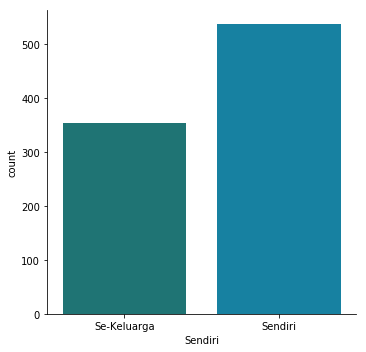

In [82]:
sns.catplot('Sendiri', data=data_df, palette='winter_d', kind='count')

In [86]:
data_df['Selamat'] = data_df.Survived.map({0: 'tidak', 1:'selamat'})
data_df['Selamat'].head()

0      tidak
1    selamat
2    selamat
3    selamat
4      tidak
Name: Selamat, dtype: object

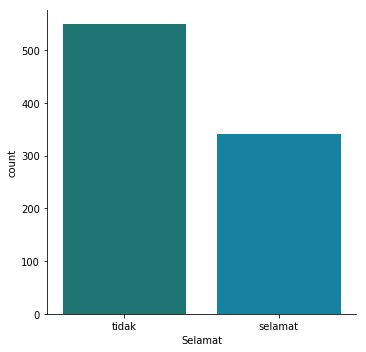

In [87]:
sns.catplot('Selamat', data=data_df, palette='winter_d', kind='count')

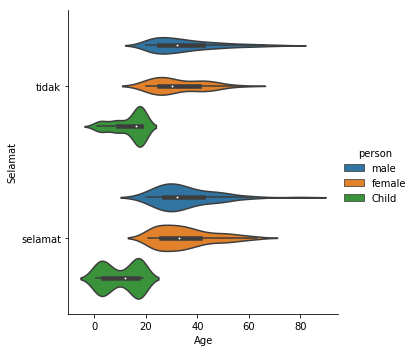

In [101]:
sns.catplot('Age','Selamat', hue='person',data=data_df, kind='violin')

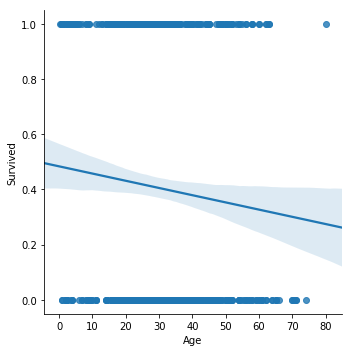

In [105]:
sns.lmplot('Age','Survived',data=data_df)

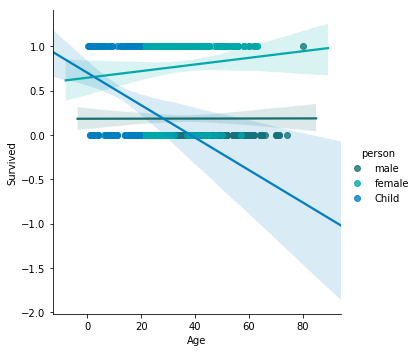

In [106]:
sns.lmplot('Age','Survived',hue='person',data=data_df, palette = 'winter_d')

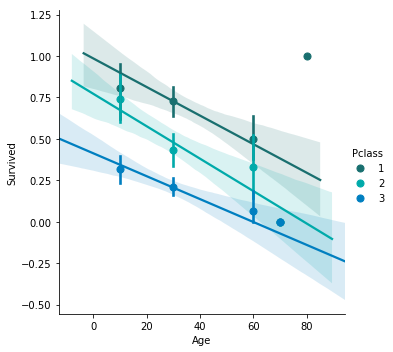

In [109]:
generasi = [10,30,60,70,80]

sns.lmplot('Age','Survived',hue='Pclass',data=data_df, palette = 'winter_d', x_bins=generasi)

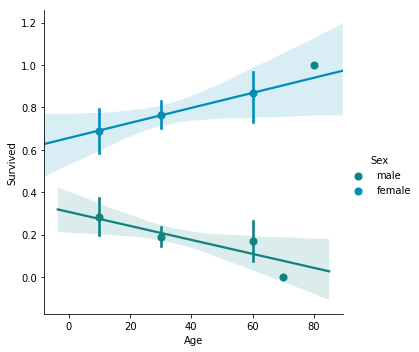

In [110]:
sns.lmplot('Age','Survived',hue='Sex',data=data_df, palette = 'winter_d', x_bins=generasi)

Dari data dibawah ini dapat kita ketahui, ternyata peluang penumpang Titanic selamat semakin besar apabila anda adalah wanita berumur, sedangkan peluang untuk lelaki berumur semakin tua maka banyak yang tidak selamat.

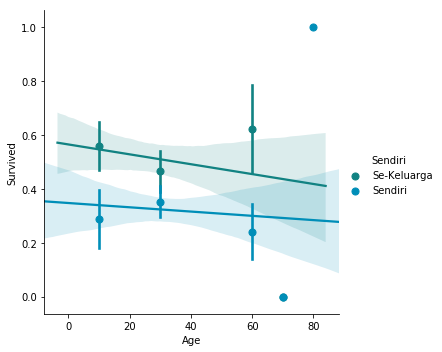

In [111]:
sns.lmplot('Age','Survived',hue='Sendiri',data=data_df, palette = 'winter_d', x_bins=generasi)

Ini untuk informasi korelasi apakah bersama keluarga atau tidak, dapat meningkatkan peluang selamat? Sila teman-teman baca dan pahami!

# Happy Analyzing the Data